In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import datetime 

In [2]:
origin_data = pd.read_csv('all_features.csv')
origin_data['cal_date'] = origin_data['cal_date'].apply(lambda x : str(x))
origin_data = origin_data[['ppi_yoy','ppi_mom','ppi_accu','nt_val','town_val','cnt_val','m0','m1','m2','gdp','pi','si','ti','settle','vol','amount','oi','close']]

train_data = origin_data[0:1000]
test_data = origin_data[1000:]

In [3]:
# Assign the y <- Prediction variable, and X <- Predicting features
# X is assigned 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
features = ['ppi_yoy', 'ppi_mom', 'ppi_accu', 'nt_val', 'town_val','cnt_val', 'm0', 'm1', 'm2', 'gdp', 'pi', 'si', 'ti', 'settle', 'vol', 'amount', 'oi']
# X = train_data[features]
# y = train_data.SalePrice

X = train_data[features]
y = train_data.close
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=1, random_state=0)
y_train = y_train.sort_index()
X_train = X_train.sort_index()
model = RandomForestRegressor(random_state=1,max_features=5,n_estimators=200,max_depth=10)
model.fit(X_train, y_train)
# preds = model.predict(X_test)

# # preds


# preds = model.predict(X_test)
# a = list(y_test)


RandomForestRegressor(max_depth=10, max_features=5, n_estimators=200,
                      random_state=1)

In [4]:
X2 = test_data[features]
y2 = test_data.close
X_train2, X_test2, y_train2, y_test2 =train_test_split(X2,y2,test_size=1, random_state=0)

y_train2 = y_train2.sort_index()
X_train2 = X_train2.sort_index()
preds2 = model.predict(X_train2)
a = list(y_train2)

In [79]:
preds2

array([13694.1508007])

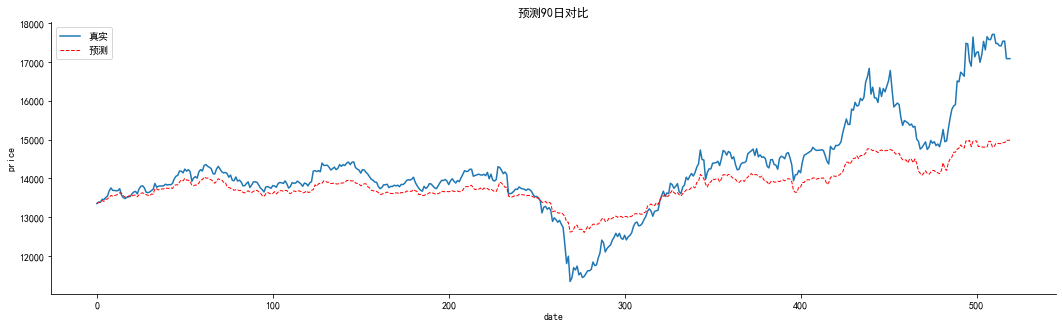

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(num=3, figsize=(18, 5))

plt.plot( a,label='真实')
plt.plot( preds2, color='red', linewidth=1.0, linestyle='--',label='预测')
# 添加图例要在线上加label 然后配合legend
plt.legend(loc='upper left')
plt.title('预测90日对比')

plt.xlabel('date')
plt.ylabel('price')

# 让右边框和上边框消失
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
plt.savefig('./预测160日数据'+hour+'.jpg')
plt.show()

In [97]:
'''
求两列表差值
input:  a:list
        b:list
output: res:list
'''
def d_value(list1,list2):
    res = []
    n = len(list1)
    for i in range(0,n):
        res.append(list1[i] - list2[i])
    return res


In [102]:
error = d_value(a,preds2)

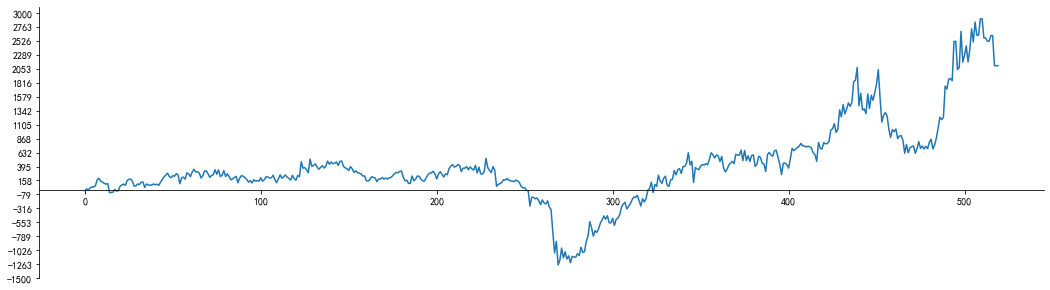

In [113]:
import numpy as np
new_ticks = np.linspace(-1500, 3000, 20)

plt.figure(num=1,figsize=(18,5))
plt.plot(error)
plt.yticks(new_ticks)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
plt.savefig('./预测差值数据'+hour+'.jpg')
plt.show()

In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
 
print(mean_absolute_error(y_train2,preds2))
print(mean_squared_error(y_train2,preds2))
print(r2_score(y_train2,preds2))

561.9681912846422
663632.1725769234
0.5204349126585391


In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
 
print(mean_absolute_error(y_train2[90:],preds2[90:]))
print(mean_squared_error(y_train2[90:],preds2[90:]))
print(r2_score(y_train2[90:],preds2[90:]))

644.7036588027153
794846.2838915229
0.5117097133717656


In [58]:
# 模型评估
errors = abs(preds2 - y_test2)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


mape = 100 * (errors / y_test2) 
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 538.15 degrees.
Accuracy: 96.41 %.


In [22]:
# 随机森林可视化
from sklearn.tree import export_graphviz
import pydot
tree_small = model.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features, rounded = True, precision = 1)
 
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
 
graph.write_png('small_tree.png');